# Data loading

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('stroke-data.csv')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data exploration



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [38]:
# Data Shape
print("Data Shape:", df.shape)

Data Shape: (5110, 12)


In [39]:
df = df.drop("id",axis=1)

In [40]:
# Data Shape
print("Data Shape:", df.shape)

Data Shape: (5110, 11)


In [13]:
# Missing Values
print("\nMissing Values:")
df.isnull().sum()



Missing Values:


,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

In [16]:
categorical_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [17]:
numerical_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [18]:
# Unique Values for Categorical Columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values for {col}:")
    print(df[col].value_counts())


Unique values for gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Unique values for ever_married:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Unique values for work_type:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Unique values for Residence_type:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Unique values for smoking_status:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64



Target Variable Distribution:
stroke
0    4861
1     249
Name: count, dtype: int64

Percentage of stroke cases: 4.87%


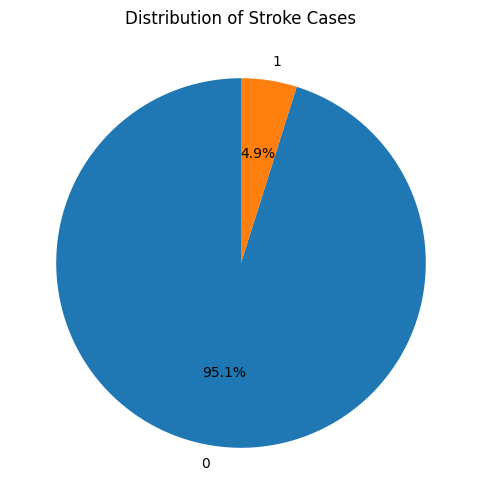

In [19]:
# Target Variable Analysis
print("\nTarget Variable Distribution:")
stroke_counts = df['stroke'].value_counts()
print(stroke_counts)
print(f"\nPercentage of stroke cases: {(stroke_counts[1] / len(df)) * 100:.2f}%")
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Stroke Cases')
plt.show()

In [22]:
# Correlation Analysis
correlation_matrix = df[numerical_cols].corr()
correlation_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


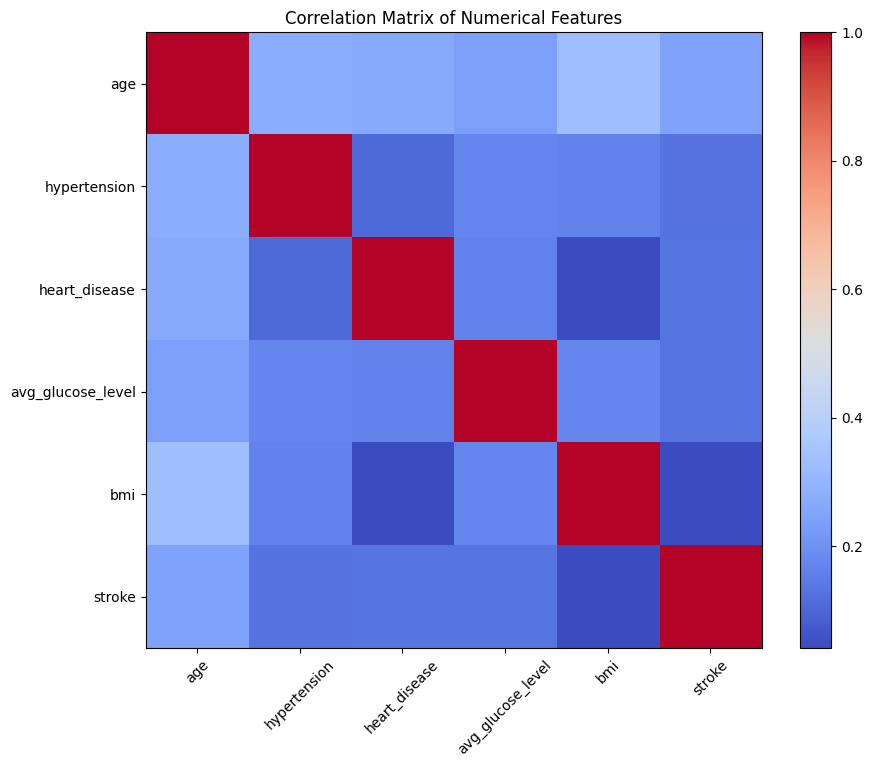

In [23]:
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(numerical_cols)), numerical_cols, rotation=45)
plt.yticks(range(len(numerical_cols)), numerical_cols)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Data cleaning

In [41]:
# Impute missing 'bmi' values
df['bmi'].fillna(df.groupby('gender')['bmi'].transform('median'), inplace=True)

In [42]:
# Missing Values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [43]:
# Address outliers
Q1_bmi = df['bmi'].quantile(0.25)
Q3_bmi = df['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi
lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi
df['bmi'] = df['bmi'].clip(lower=lower_bound_bmi, upper=upper_bound_bmi)

In [44]:
Q1_glucose = df['avg_glucose_level'].quantile(0.25)
Q3_glucose = df['avg_glucose_level'].quantile(0.75)
IQR_glucose = Q3_glucose - Q1_glucose
lower_bound_glucose = Q1_glucose - 1.5 * IQR_glucose
upper_bound_glucose = Q3_glucose + 1.5 * IQR_glucose
df['avg_glucose_level'] = df['avg_glucose_level'].clip(lower=lower_bound_glucose, upper=upper_bound_glucose)


In [45]:
# Correct inconsistent values
df['gender'].replace('Other', df['gender'].mode()[0], inplace=True)
df['smoking_status'].replace('Unknown', 'never smoked', inplace=True)

In [46]:
if df['age'].dtype == 'object':
    df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [47]:
# Duplicate rows
df.drop_duplicates(inplace=True)

In [48]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,27.8,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.0,never smoked,1


# Data analysis

In [59]:
bmi_avg_value = df.groupby(['Age_Group', 'gender'])['bmi'].median().reset_index()

In [60]:
bmi_avg_value

,Age_Group,gender,bmi
0,Adolescense,Female,26.60
1,Adolescense,Male,26.00
2,Adult,Female,27.85
3,Adult,Male,29.30
4,Infant,Female,17.35
5,Infant,Male,18.40
6,Middle Aged,Female,29.60
7,Middle Aged,Male,30.50
8,Preschooler,Female,18.25
9,Preschooler,Male,18.10


Target Variable Distribution:
stroke
0    4007
1     247
Name: count, dtype: int64

Percentage of stroke cases: 5.81%


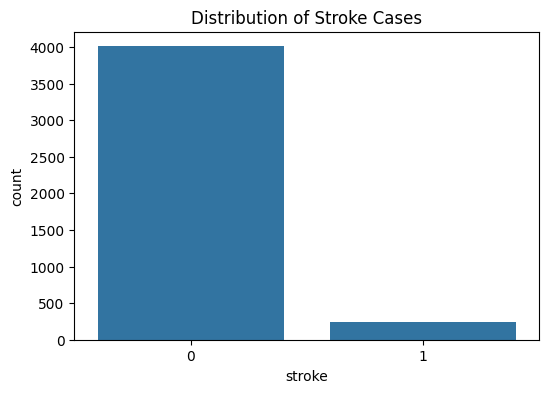

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analyze the distribution of the target variable 'stroke'
print("Target Variable Distribution:")
stroke_counts = df['stroke'].value_counts()
print(stroke_counts)
print(f"\nPercentage of stroke cases: {(stroke_counts[1] / len(df)) * 100:.2f}%")

plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke Cases')
plt.show()


Stroke Rates by hypertension:
hypertension
0    0.048177
1    0.132797
Name: stroke, dtype: float64


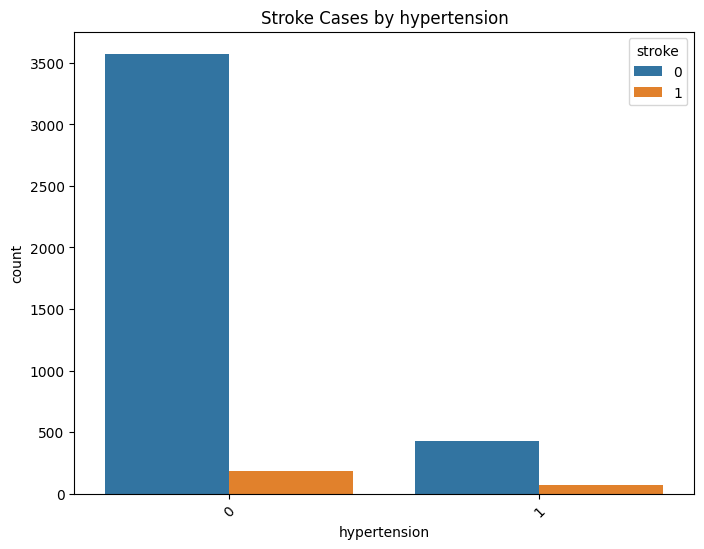


Stroke Rates by heart_disease:
heart_disease
0    0.050264
1    0.170909
Name: stroke, dtype: float64


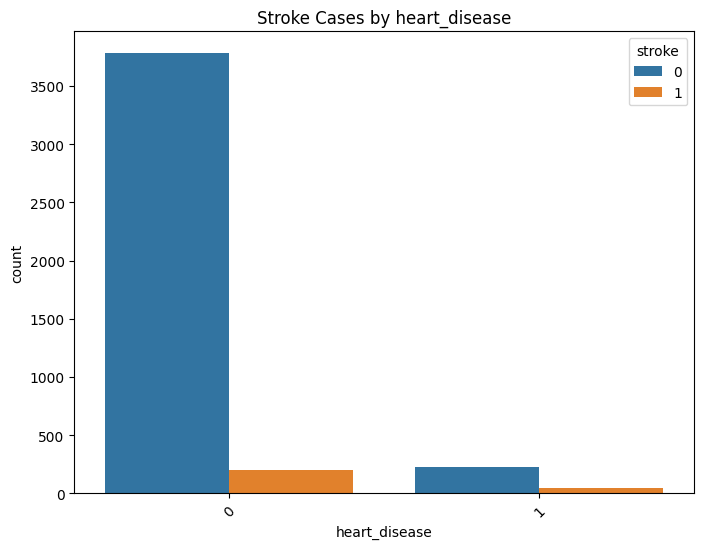


Stroke Rates by ever_married:
ever_married
No     0.029967
Yes    0.065613
Name: stroke, dtype: float64


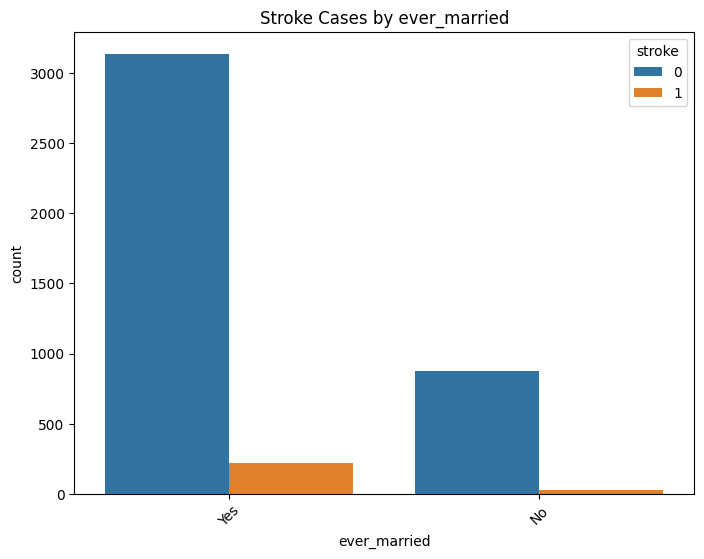


Stroke Rates by work_type:
work_type
Govt_job         0.050691
Never_worked     0.000000
Private          0.053386
Self-employed    0.080545
Name: stroke, dtype: float64


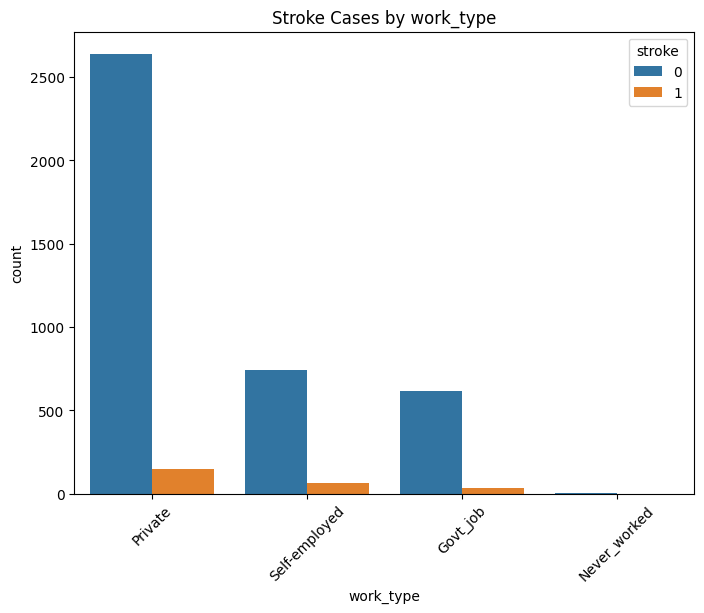


Stroke Rates by Residence_type:
Residence_type
Rural    0.054197
Urban    0.061780
Name: stroke, dtype: float64


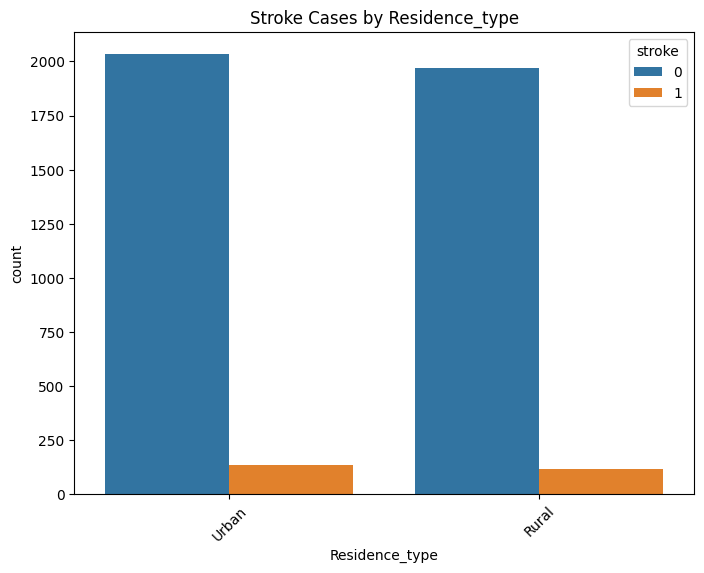


Stroke Rates by smoking_status:
smoking_status
formerly smoked    0.081395
never smoked       0.051645
smokes             0.053846
Name: stroke, dtype: float64


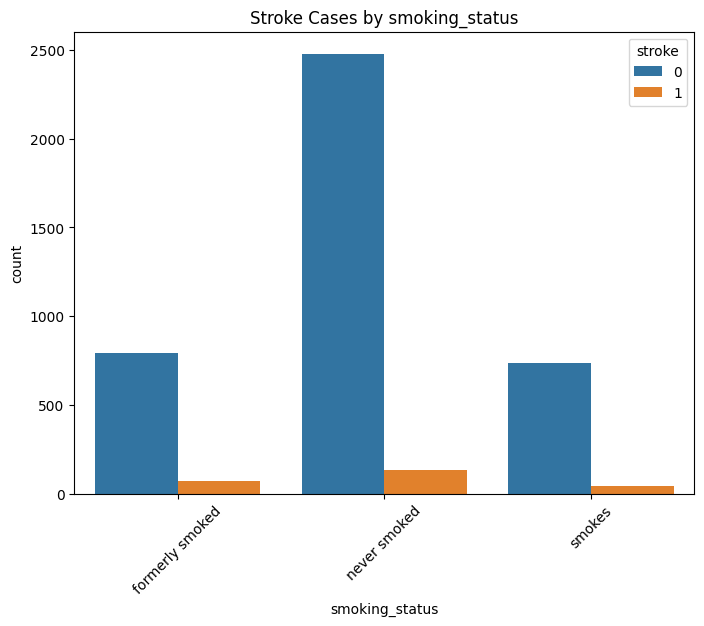


Stroke Rates by gender:
gender
Female    0.053939
Male      0.064401
Name: stroke, dtype: float64


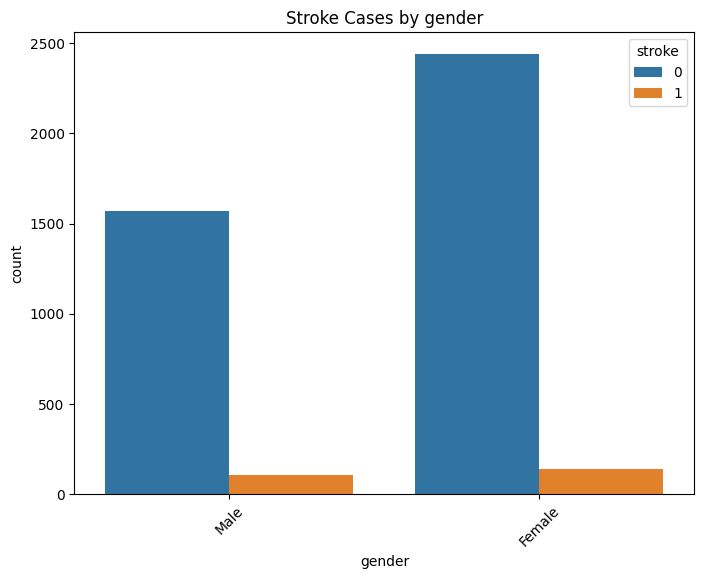

In [ ]:
# 2. Explore the relationship between 'stroke' and other features
categorical_cols = ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'gender']
for col in categorical_cols:
    print(f"\nStroke Rates by {col}:")
    print(df.groupby(col)['stroke'].mean())
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='stroke', data=df)
    plt.title(f'Stroke Cases by {col}')
    plt.xticks(rotation=45)
    plt.show()

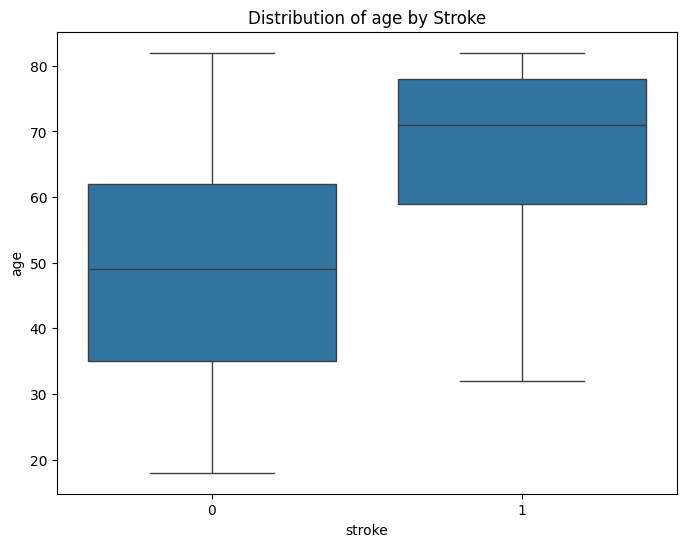

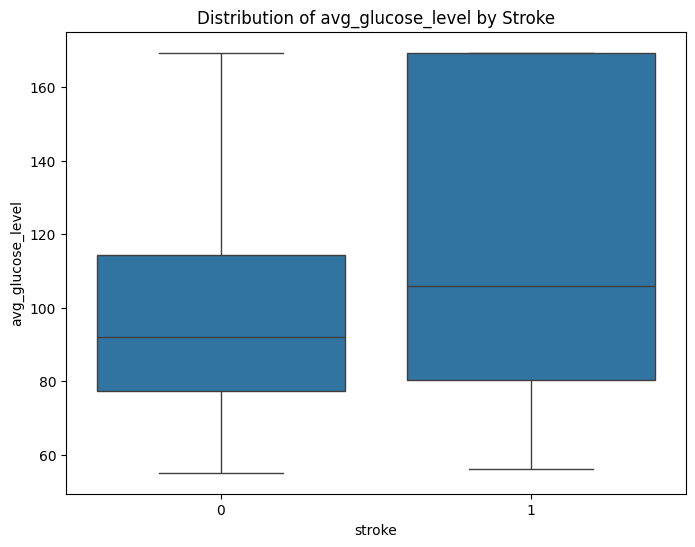

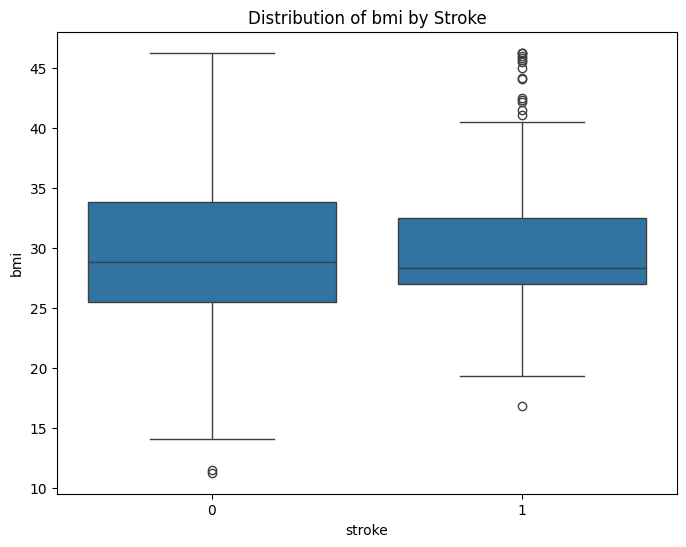

In [ ]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='stroke', y=col, data=df)
    plt.title(f'Distribution of {col} by Stroke')
    plt.show()

In [ ]:
# 3. Calculate and visualize the correlation between numerical features and the target variable
correlation_matrix = df[numerical_cols + ['stroke']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                         age  avg_glucose_level       bmi    stroke
age                1.000000           0.195496  0.037940  0.250861
avg_glucose_level  0.195496           1.000000  0.136271  0.115182
bmi                0.037940           0.136271  1.000000 -0.004062
stroke             0.250861           0.115182 -0.004062  1.000000


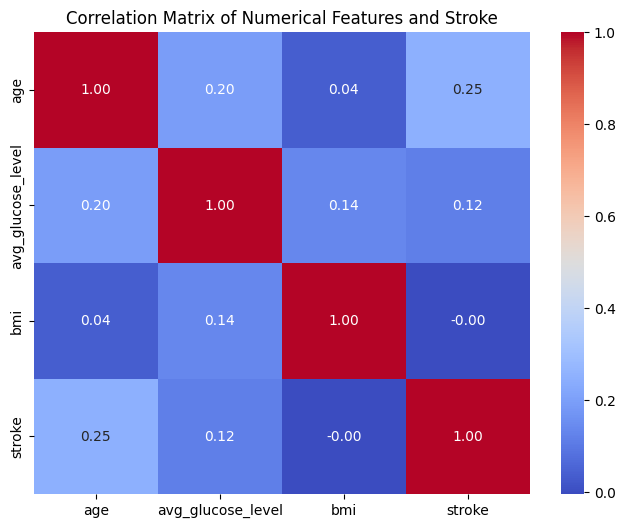

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Stroke')
plt.show()

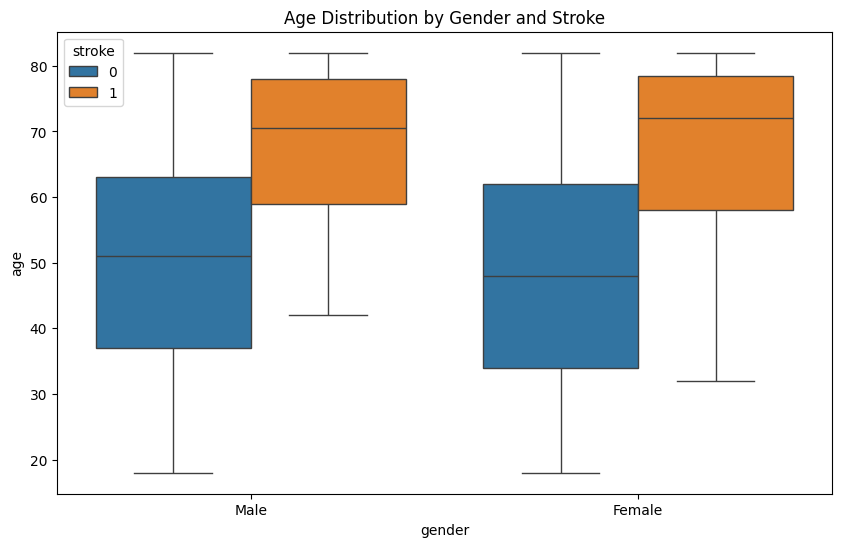

In [ ]:
# 4. Investigate potential confounding factors (example: age and gender)
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', hue='stroke', data=df)
plt.title('Age Distribution by Gender and Stroke')
plt.show()

# Data visualization


In [52]:
from matplotlib import pyplot as plt
import seaborn as sns

In [61]:
def categorize_BMI(bmi):
    if bmi  < 18.5:
        return 'Underweight'
    elif 18.5<= bmi <= 24.9:
        return 'Normal Weight'
    elif 24.9< bmi <= 29.9:
        return 'Overweight'
    elif 29.9< bmi <= 34.9:
        return 'Moderately Obese'
    elif 34.9< bmi <= 40:
        return 'Severely Obese'
    else:
        return 'Extreme Obese'

In [62]:
df['BMI_Group'] = df['bmi'].apply(categorize_BMI)

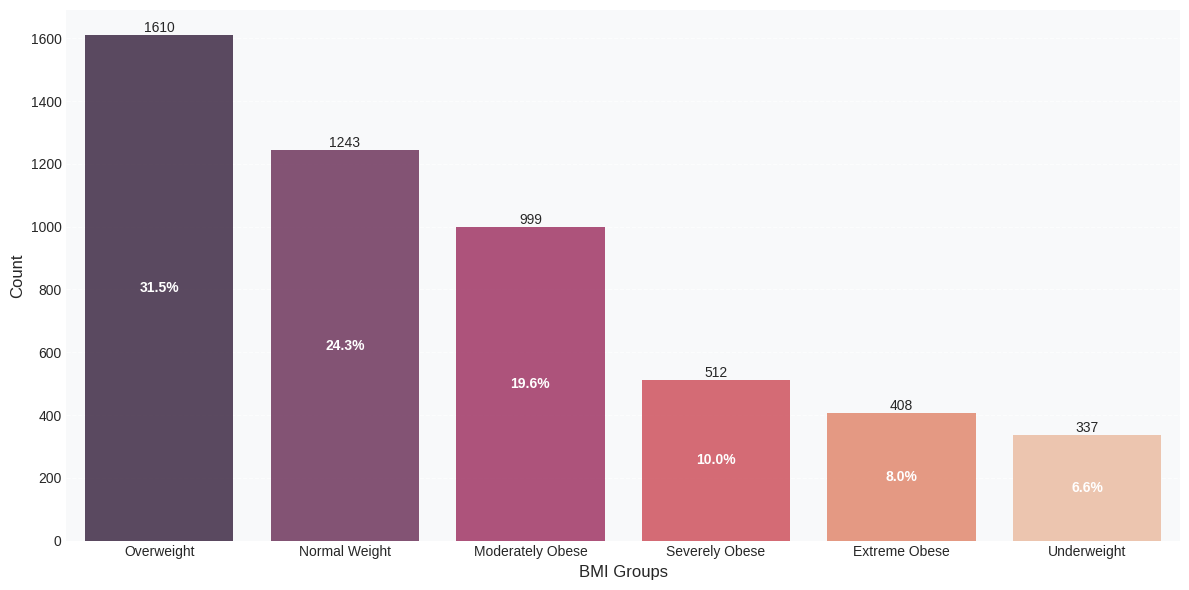

In [63]:
plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(12, 6))

bmi_counts = df['BMI_Group'].value_counts()
ax = sns.barplot(x=bmi_counts.index,
                 y=bmi_counts.values,
                 palette='rocket',
                 alpha=0.8)

plt.xlabel('BMI Groups', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, v in enumerate(bmi_counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.7)


plt.xticks(rotation=0)


ax.set_facecolor('#f8f9fa')


total = bmi_counts.sum()
for i, v in enumerate(bmi_counts.values):
    percentage = (v/total) * 100
    ax.text(i, v/2, f'{percentage:.1f}%',
            ha='center',
            va='center',
            color='white',
            fontweight='bold')

plt.tight_layout()

plt.show()

In [65]:
df['Glucose_Level_Group'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

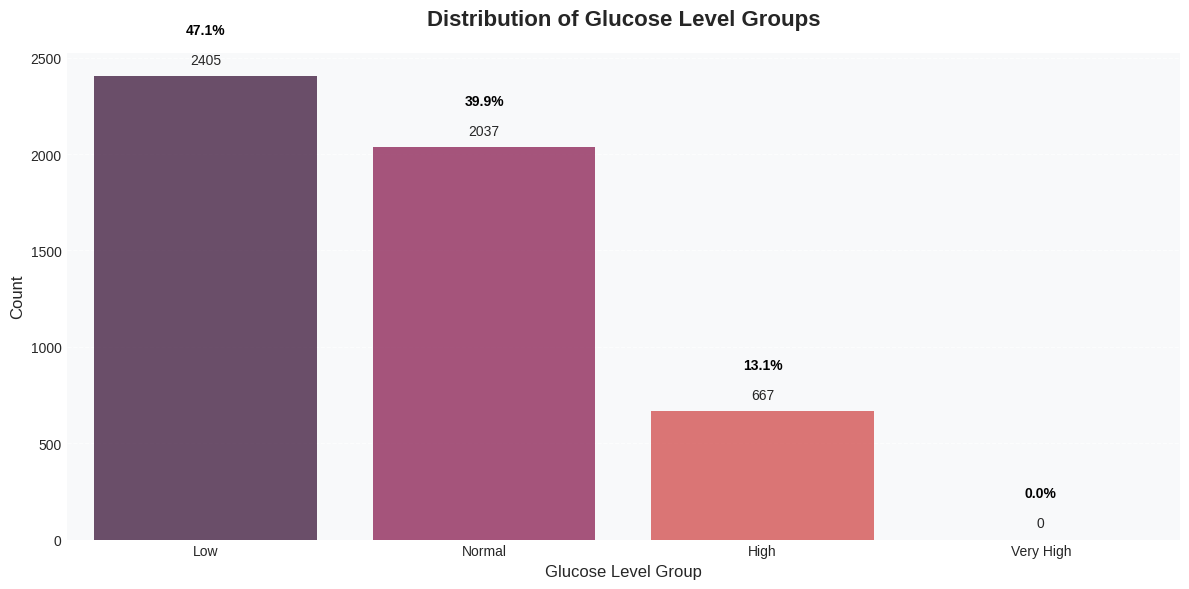

In [66]:
plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(12, 6))

glc_counts = df['Glucose_Level_Group'].value_counts()

ax = sns.barplot(x=glc_counts.index,
                 y=glc_counts.values,
                 palette='rocket',
                 alpha=0.8)

plt.title('Distribution of Glucose Level Groups', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Glucose Level Group', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, v in enumerate(glc_counts.values):
    ax.text(i, v + 0.02 * glc_counts.max(), str(v), ha='center', va='bottom', fontsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=0)

ax.set_facecolor('#f8f9fa')

total = glc_counts.sum()
for i, v in enumerate(glc_counts.values):
    percentage = (v/total) * 100

    ax.text(i, v + 0.1 * glc_counts.max(), f'{percentage:.1f}%',
            ha='center',
            va='center',
            color='black',
            fontweight='bold')

plt.tight_layout()

plt.show()

In [68]:
stroke_positive = df[df['stroke'] == 1]
stroke_negative = df[df['stroke'] == 0]

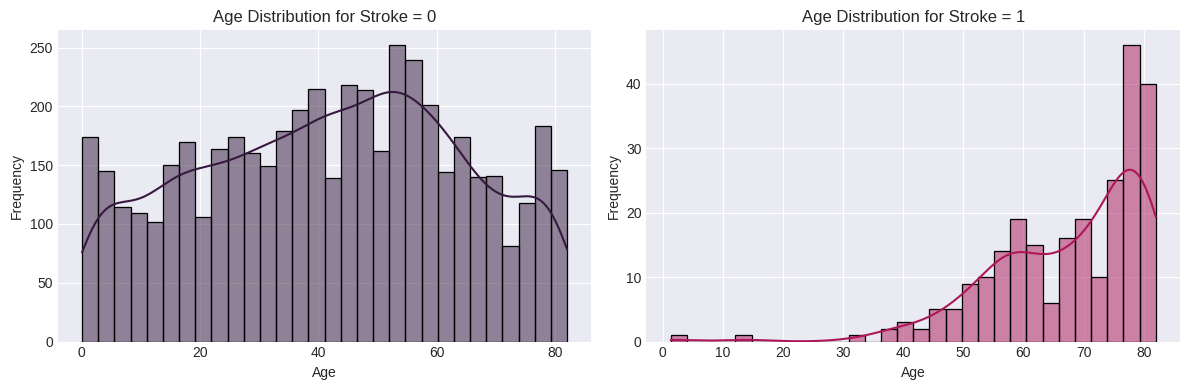

In [70]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=stroke_negative, x='age', bins=30, kde=True, color='#35193e', ax=axes[0])
axes[0].set_title('Age Distribution for Stroke = 0')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

sns.histplot(data=stroke_positive, x='age', bins=30, kde=True, color='#ad1759', ax=axes[1])
axes[1].set_title('Age Distribution for Stroke = 1')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [73]:
stroke_negative = df[df['stroke'] == 0]
stroke_positive = df[df['stroke'] == 1]
correlation_positive = stroke_positive[['bmi', 'avg_glucose_level']].corr()
correlation_negative = stroke_negative[['bmi', 'avg_glucose_level']].corr()

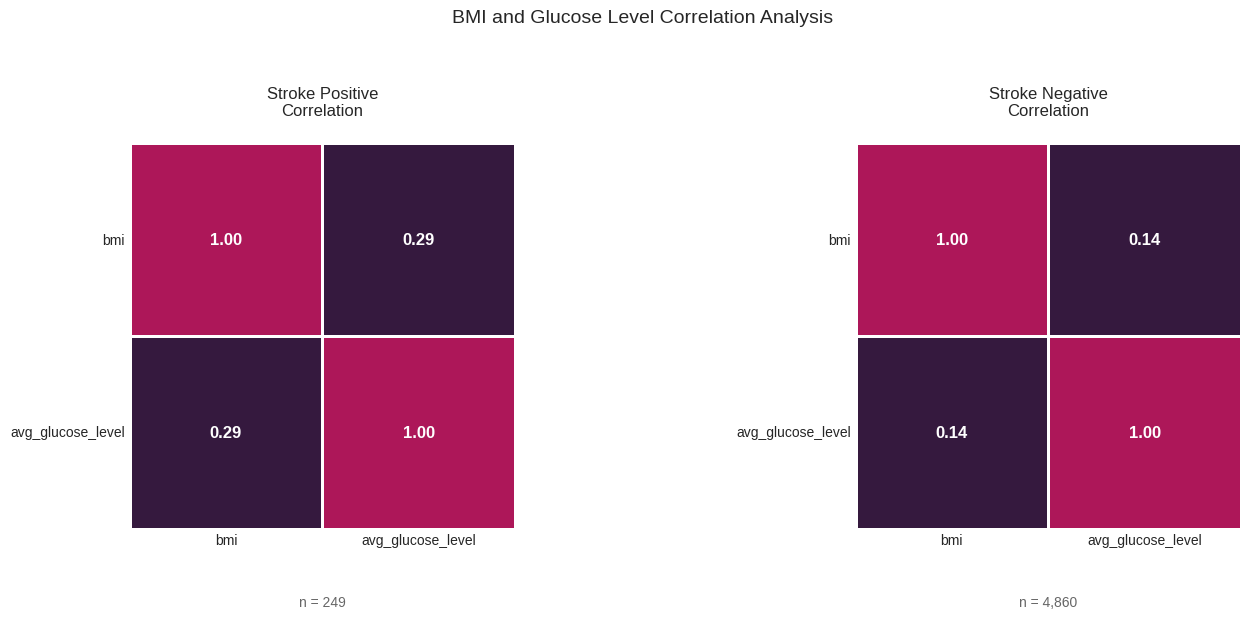

In [74]:
# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Custom dark purple and rose red colormap
dark_purple_rose_red_cmap = sns.color_palette(["#35193e", "#ad1759"], as_cmap=True)

# First heatmap (Positive cases)
sns.heatmap(correlation_positive,
            annot=True,
            cmap=dark_purple_rose_red_cmap,
            fmt='.2f',
            square=True,
            cbar=False,
            ax=ax1,
            annot_kws={'size': 12, 'weight': 'bold'},
            linewidths=2,
            linecolor='white')

ax1.set_title('Stroke Positive\nCorrelation',
              pad=20,
              fontsize=12,
              fontweight='light',
              family='sans-serif')

# Second heatmap (Negative cases)
sns.heatmap(correlation_negative,
            annot=True,
            cmap=dark_purple_rose_red_cmap,
            fmt='.2f',
            square=True,
            cbar=False,
            ax=ax2,
            annot_kws={'size': 12, 'weight': 'bold'},
            linewidths=2,
            linecolor='white')

ax2.set_title('Stroke Negative\nCorrelation',
              pad=20,
              fontsize=12,
              fontweight='light',
              family='sans-serif')

# Add minimal sample size information
for ax, data, title in [(ax1, stroke_positive, 'Positive'),
                        (ax2, stroke_negative, 'Negative')]:
    ax.text(0.5, -0.2,
            f'n = {len(data):,}',
            transform=ax.transAxes,
            fontsize=10,
            ha='center',
            color='#666666')

    # Clean up axes
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Add subtle main title
plt.suptitle('BMI and Glucose Level Correlation Analysis',
             fontsize=14,
             fontweight='light',
             y=1.05,
             family='sans-serif')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

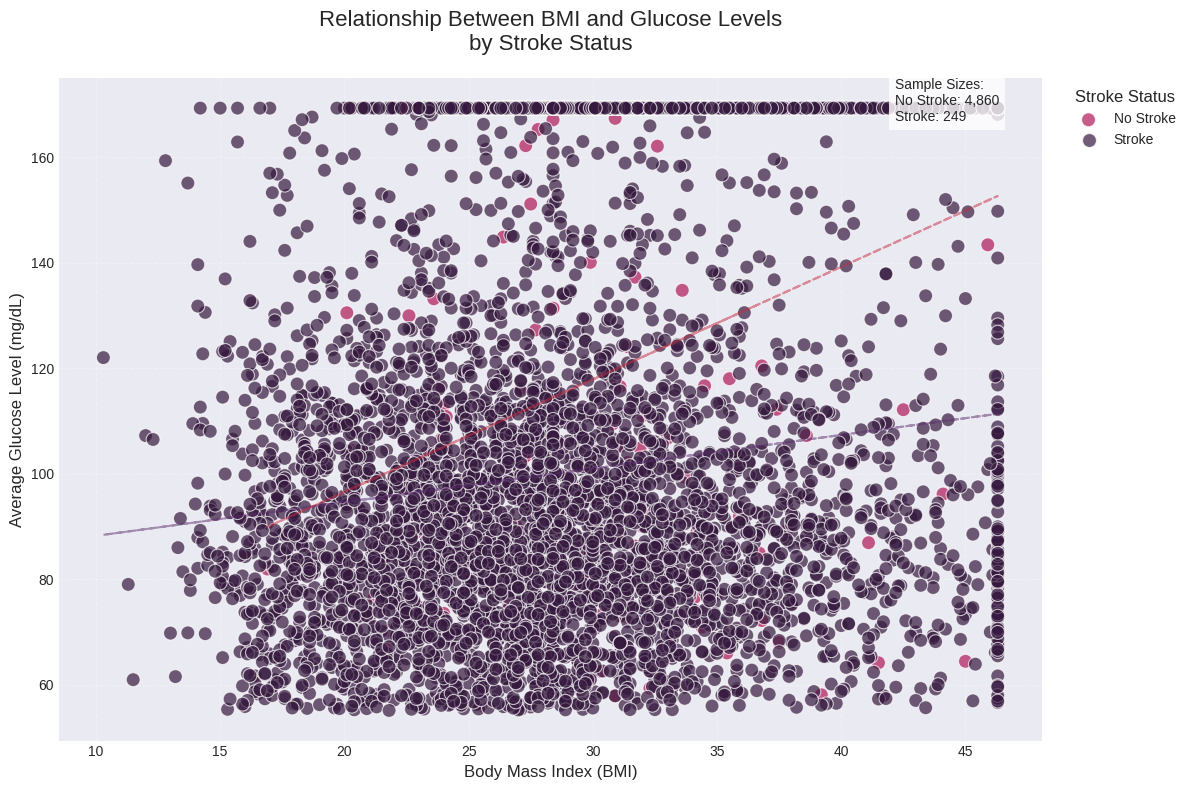

In [77]:
import numpy as np

plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(
    data=df,
    x='bmi',
    y='avg_glucose_level',
    hue='stroke',
    alpha=0.7,
    s=100,
    palette={0: '#35193e', 1: '#ad1759'},
    legend='brief'
)

for stroke_status in [0, 1]:
    mask = df['stroke'] == stroke_status
    x = df[mask]['bmi']
    y = df[mask]['avg_glucose_level']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x),
             linestyle='--',
             alpha=0.5,
             color='#5A2A6C' if stroke_status == 0 else '#C72C41')

plt.title('Relationship Between BMI and Glucose Levels\nby Stroke Status',
         fontsize=16,
         pad=20,
         fontweight='light',
         family='sans-serif')

plt.xlabel('Body Mass Index (BMI)',
          fontsize=12,
          fontweight='light')
plt.ylabel('Average Glucose Level (mg/dL)',
          fontsize=12,
          fontweight='light')

legend = plt.legend(title='Stroke Status',
                   labels=['No Stroke', 'Stroke'],
                   title_fontsize=12,
                   fontsize=10,
                   bbox_to_anchor=(1.02, 1),
                   loc='upper left')
legend.get_frame().set_alpha(0.9)
legend.get_frame().set_edgecolor('white')

plt.grid(True, linestyle='--', alpha=0.3)

stroke_counts = df['stroke'].value_counts()
plt.text(0.85, 1,
         f'Sample Sizes:\nNo Stroke: {stroke_counts[0]:,}\nStroke: {stroke_counts[1]:,}',
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

scatter.spines['top'].set_visible(False)
scatter.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

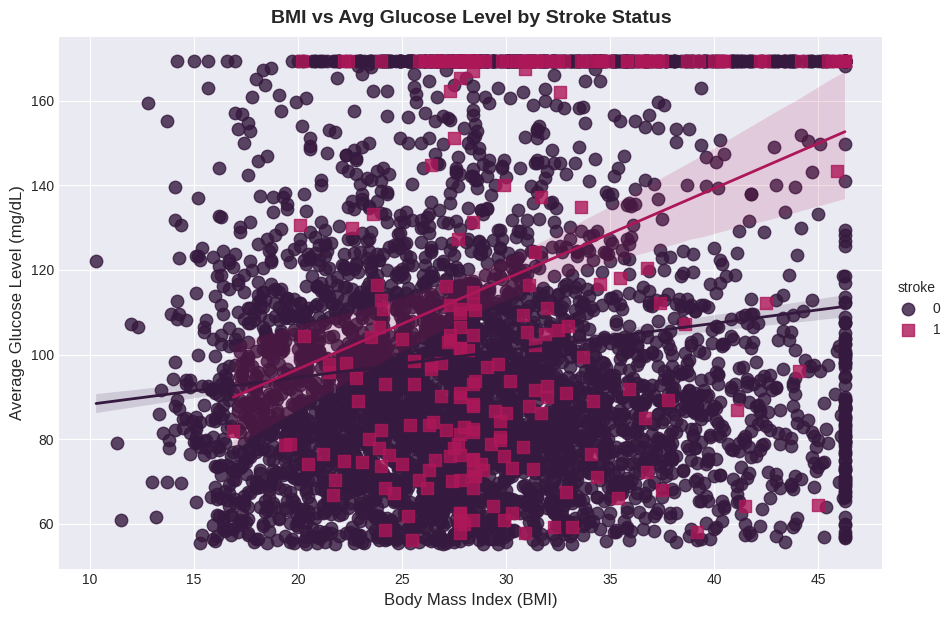

In [78]:
palette = {0: '#35193e', 1: '#ad1759'}

g = sns.lmplot(
    data=df,
    x='bmi',
    y='avg_glucose_level',
    hue='stroke',
    height=6,
    aspect=1.5,
    markers=['o', 's'],
    palette=palette,
    scatter_kws={'s': 80, 'alpha': 0.8},
    line_kws={'linewidth': 2}
)

g.set_axis_labels("Body Mass Index (BMI)", "Average Glucose Level (mg/dL)", fontsize=12)
g.fig.suptitle("BMI vs Avg Glucose Level by Stroke Status", y=1.02, fontsize=14, weight='bold')

plt.show()

In [79]:
df['smoking_status'].value_counts()

,count
smoking_status,
never smoked,3435
formerly smoked,885
smokes,789


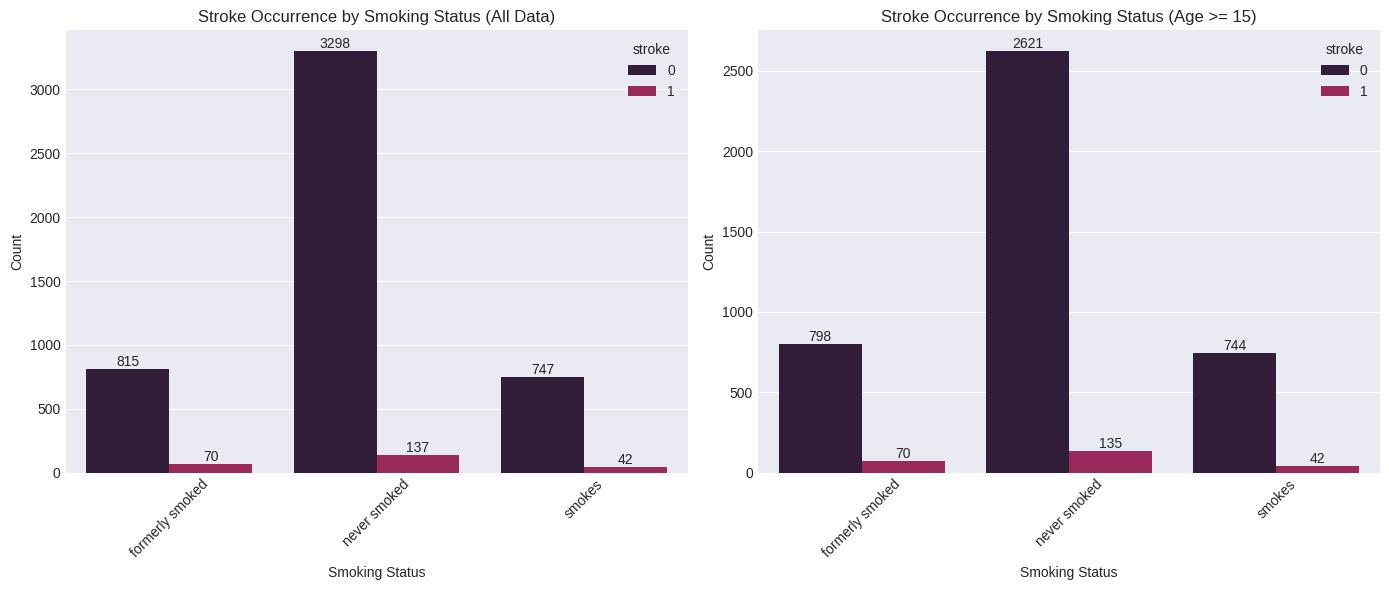

In [81]:
df_filtered = df[df['age'] >= 15]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

palette = {0: '#35193e', 1: '#ad1759'}

sns.countplot(data=df, x='smoking_status', hue='stroke', ax=axes[0], palette=palette)
axes[0].set_title('Stroke Occurrence by Smoking Status (All Data)')
axes[0].set_xlabel('Smoking Status')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d')

sns.countplot(data=df_filtered, x='smoking_status', hue='stroke', ax=axes[1], palette=palette)
axes[1].set_title('Stroke Occurrence by Smoking Status (Age >= 15)')
axes[1].set_xlabel('Smoking Status')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d')

plt.tight_layout()

plt.show()

In [82]:
grouped = df.groupby('heart_disease')['stroke'].mean().reset_index()

In [83]:
grouped

,heart_disease,stroke
0,0,0.041796
1,1,0.170290


In [84]:
df_grouped = df.groupby(['heart_disease', 'stroke']).size().unstack(fill_value=0)

In [85]:
df_grouped_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

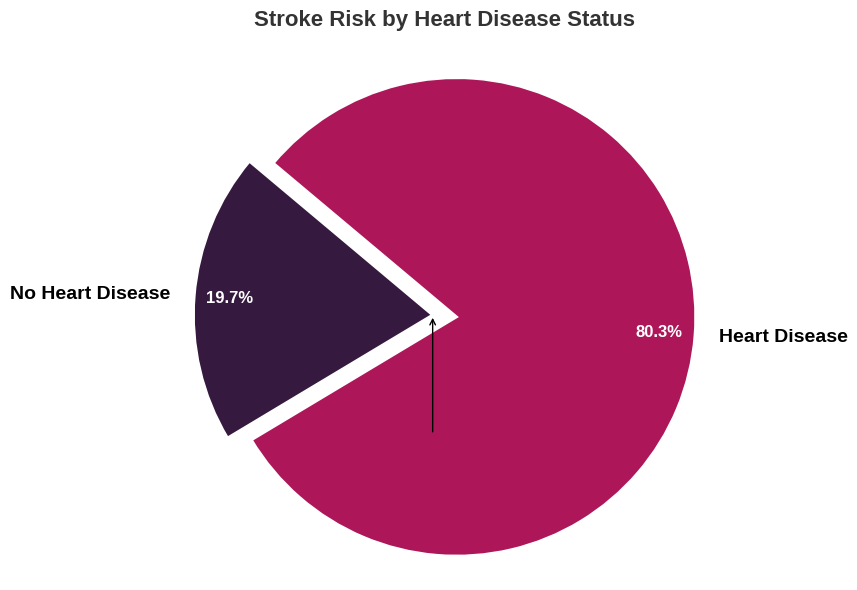

In [86]:
labels = ['No Heart Disease', 'Heart Disease']
sizes = df_grouped_percent[1]
colors = ['#35193e', '#ad1759']
explode = [0, 0.1]

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'linestyle': 'solid'}
)

plt.setp(autotexts, size=12, weight="bold", color='white')
plt.setp(texts, size=14, weight="bold", color='black')
ax.set_title('Stroke Risk by Heart Disease Status', fontsize=16, weight='bold', color='#333333', pad=20)

ax.annotate('', xy=(0, 0), xytext=(0, -0.5),
            arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->', lw=1))

ax.axis('equal')

plt.tight_layout()
plt.show()

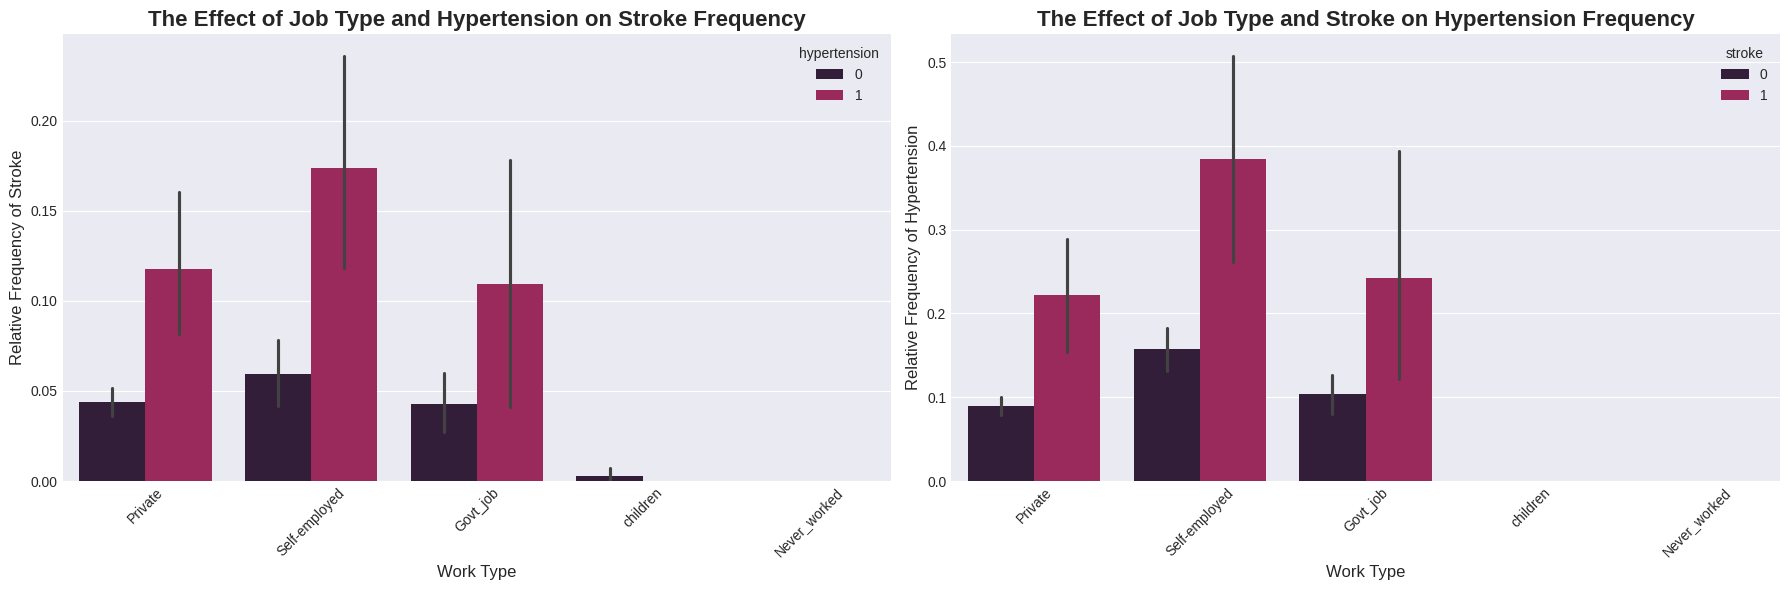

In [100]:
palette = {0: '#35193e', 1: '#ad1759'}

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x='work_type', y='stroke', hue='hypertension', data=df, palette=palette, ax=axes[0])
axes[0].set_title('The Effect of Job Type and Hypertension on Stroke Frequency', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Work Type', fontsize=12)
axes[0].set_ylabel('Relative Frequency of Stroke', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(
    x='work_type',
    y='hypertension',
    hue='stroke',
    data=df,
    palette=palette,
    ax=axes[1]
)
axes[1].set_title('The Effect of Job Type and Stroke on Hypertension Frequency', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Work Type', fontsize=12)
axes[1].set_ylabel('Relative Frequency of Hypertension', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

In [101]:
grouped_work_stress_male = df[df['gender'] == 'Male' ].groupby(['work_type'])['stroke'].mean().reset_index()
grouped_lifestyle_stress_male = df[df['gender'] == 'Male'].groupby(['smoking_status', 'ever_married', 'bmi'])['stroke'].mean().reset_index()

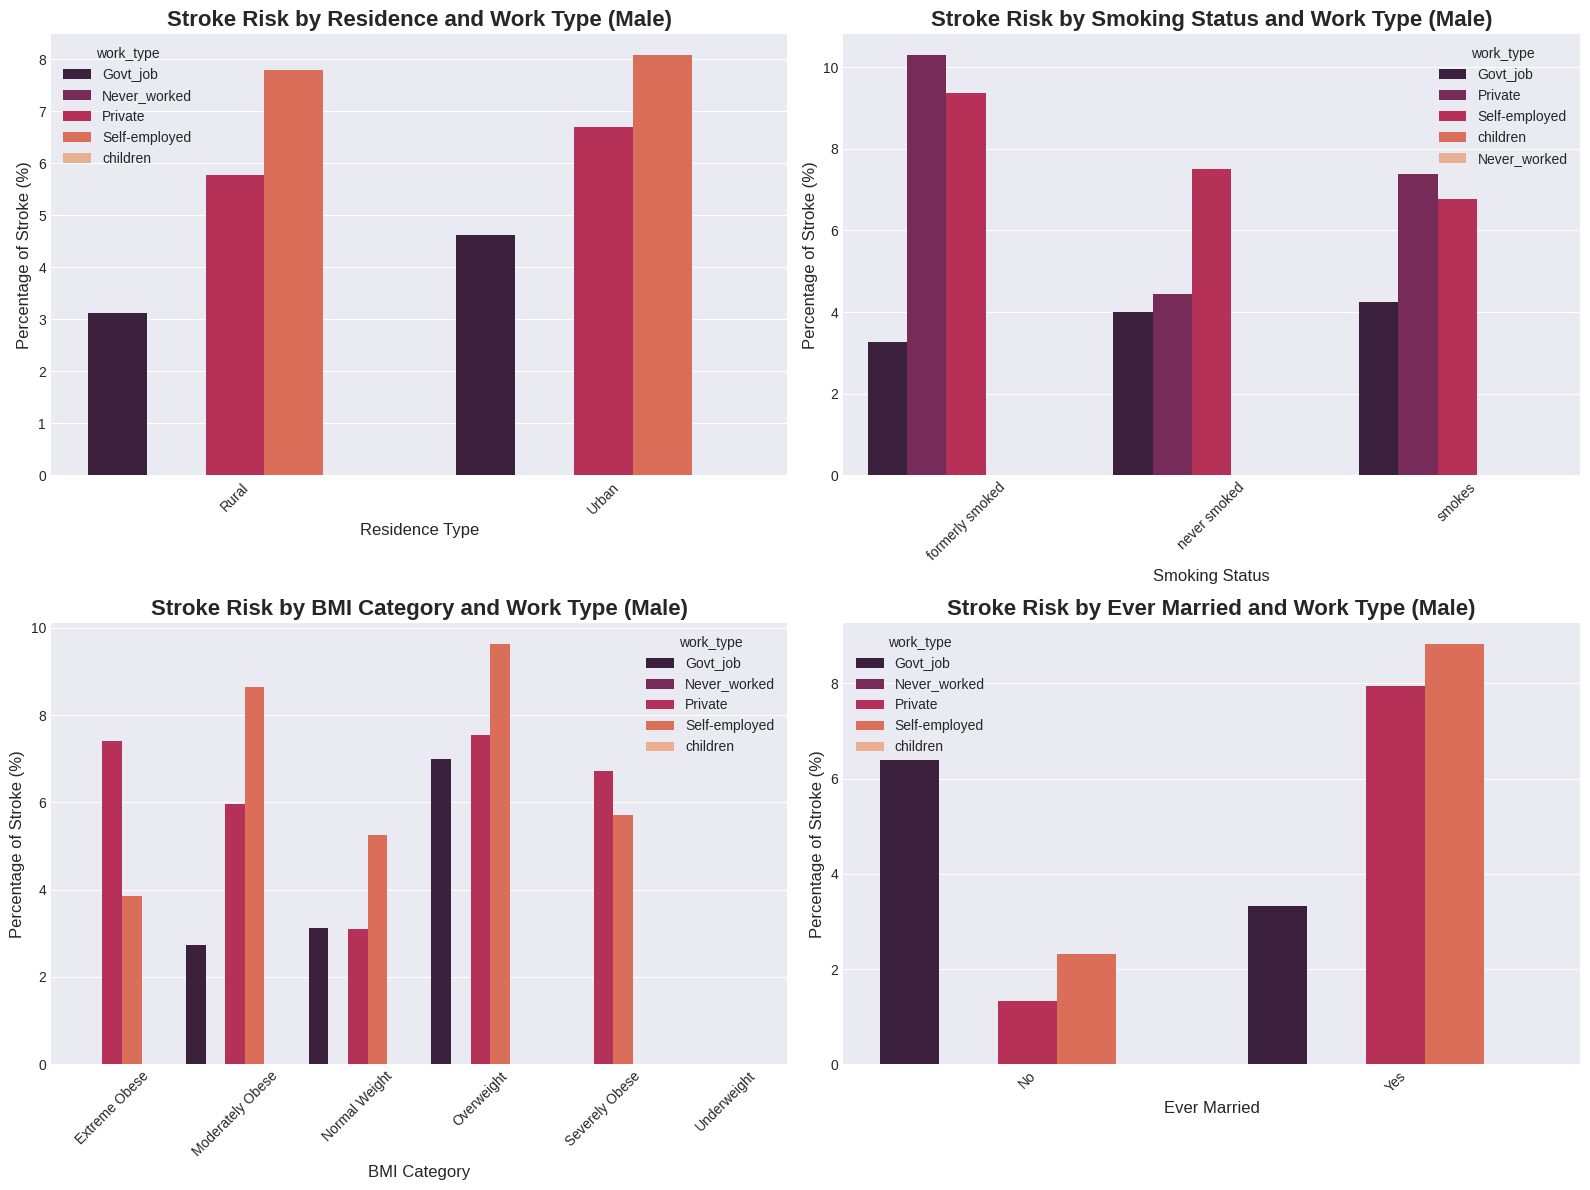

In [107]:
# Filter for male patients
df_male = df[df['gender'] == 'Male']

# Create separate grouped DataFrames for each plot
def create_grouped_data(data, group_cols):
    grouped = data.groupby(group_cols)['stroke'].mean() * 100
    return grouped.reset_index()

# Create grouped data for each plot
residence_work = create_grouped_data(df_male, ['Residence_type', 'work_type'])
smoking_work = create_grouped_data(df_male, ['smoking_status', 'work_type'])
bmi_work = create_grouped_data(df_male, ['BMI_Group', 'work_type'])
married_work = create_grouped_data(df_male, ['ever_married', 'work_type'])

# Create subplot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Residence Type and Work Type
sns.barplot(data=residence_work,
            x='Residence_type',
            y='stroke',
            hue='work_type',
            palette='rocket',
            ax=axes[0, 0])

axes[0, 0].set_title('Stroke Risk by Residence and Work Type (Male)', fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel('Residence Type', fontsize=12)
axes[0, 0].set_ylabel('Percentage of Stroke (%)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Smoking Status and Work Type
sns.barplot(data=smoking_work,
            x='smoking_status',
            y='stroke',
            hue='work_type',
            palette='rocket',
            ax=axes[0, 1])

axes[0, 1].set_title('Stroke Risk by Smoking Status and Work Type (Male)', fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel('Smoking Status', fontsize=12)
axes[0, 1].set_ylabel('Percentage of Stroke (%)', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: BMI Group and Work Type
sns.barplot(data=bmi_work,
            x='BMI_Group',
            y='stroke',
            hue='work_type',
            palette='rocket',
            ax=axes[1, 0])

axes[1, 0].set_title('Stroke Risk by BMI Category and Work Type (Male)', fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel('BMI Category', fontsize=12)
axes[1, 0].set_ylabel('Percentage of Stroke (%)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Marriage Status and Work Type
sns.barplot(data=married_work,
            x='ever_married',
            y='stroke',
            hue='work_type',
            palette='rocket',
            ax=axes[1, 1])

axes[1, 1].set_title('Stroke Risk by Ever Married and Work Type (Male)', fontsize=16, fontweight='bold')
axes[1, 1].set_xlabel('Ever Married', fontsize=12)
axes[1, 1].set_ylabel('Percentage of Stroke (%)', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [49]:
def categorize_age(age):
    if age >= 0 and age <= 1:
        return 'Infant'
    elif age >1 and age <= 3:
        return 'Toddler'
    elif age >3 and age <= 6:
        return 'Preschooler'
    elif age > 6 and age <= 12:
        return 'School Age'
    elif age > 12 and age < 20:
        return 'Teenager'
    elif age >= 20 and age <= 24:
        return 'Adolescense'
    elif age > 24 and age <= 39:
        return 'Adult'
    elif age > 39 and age <= 59:
        return 'Middle Aged'
    else:
        return 'Senior'

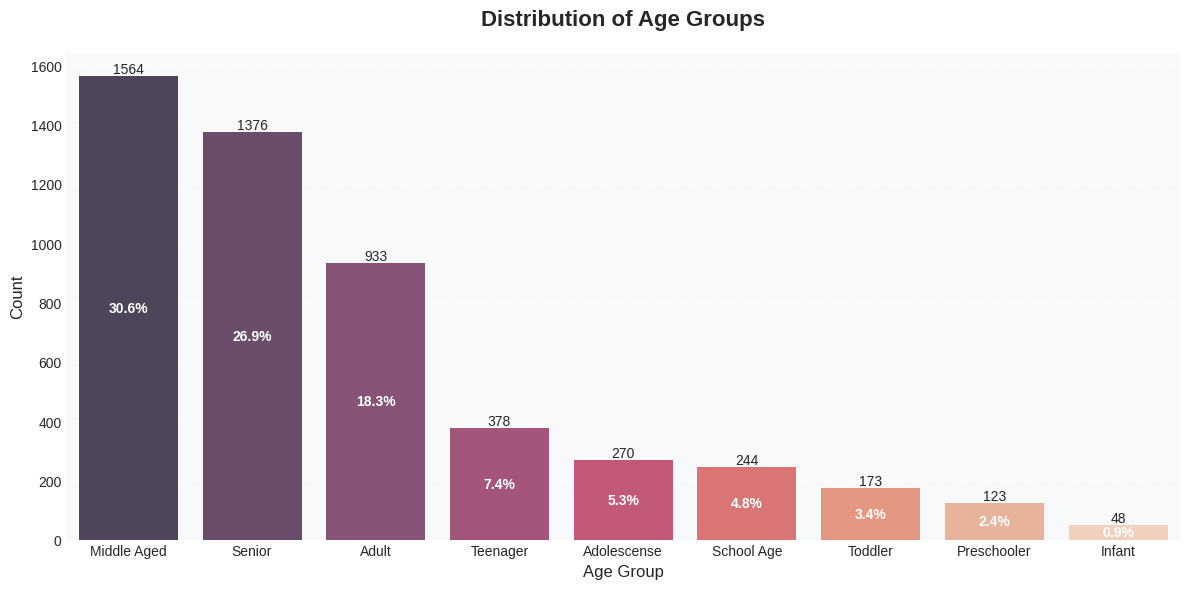

In [53]:
df['Age_Group'] = df['age'].apply(categorize_age)

plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(12, 6))

age_counts = df['Age_Group'].value_counts()
ax = sns.barplot(x=age_counts.index,
                 y=age_counts.values,
                 palette='rocket',
                 alpha=0.8)

plt.title('Distribution of Age Groups', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, v in enumerate(age_counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.7)


plt.xticks(rotation=0)


ax.set_facecolor('#f8f9fa')


total = age_counts.sum()
for i, v in enumerate(age_counts.values):
    percentage = (v/total) * 100
    ax.text(i, v/2, f'{percentage:.1f}%',
            ha='center',
            va='center',
            color='white',
            fontweight='bold')

plt.tight_layout()

plt.show()

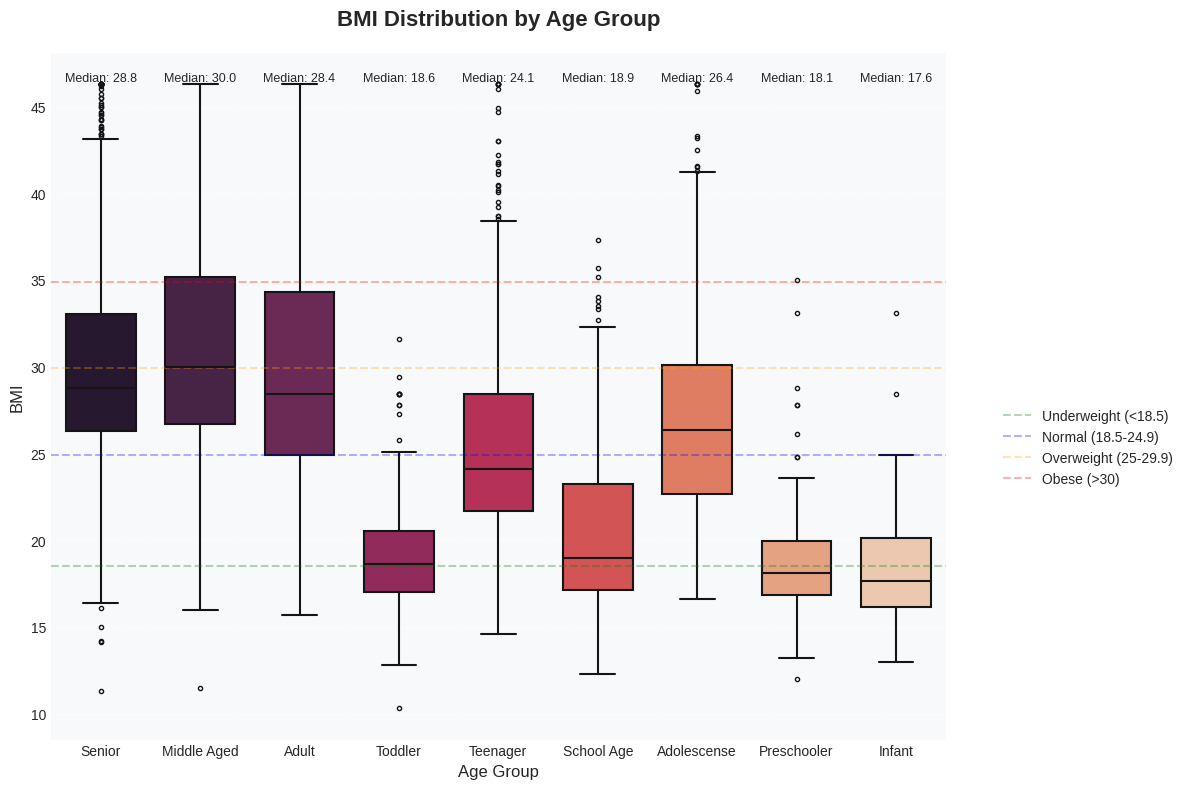

In [56]:
plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(12, 8))


ax = sns.boxplot(data=df,
                 x='Age_Group',
                 y='bmi',
                 palette='rocket',
                 width=0.7,
                 fliersize=3,
                 linewidth=1.5)


plt.title('BMI Distribution by Age Group', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('BMI', fontsize=12)

ax.set_facecolor('#f8f9fa')

ax.grid(axis='y', linestyle='--', alpha=0.7)


for i in range(len(df['Age_Group'].unique())):
    age_group = df['Age_Group'].unique()[i]
    median = df[df['Age_Group'] == age_group]['bmi'].median()
    ax.text(i, df['bmi'].max(), f'Median: {median:.1f}',
            ha='center', va='bottom', fontsize=9)

plt.axhline(y=18.5, color='green', linestyle='--', alpha=0.3, label='Underweight (<18.5)')
plt.axhline(y=24.9, color='blue', linestyle='--', alpha=0.3, label='Normal (18.5-24.9)')
plt.axhline(y=29.9, color='orange', linestyle='--', alpha=0.3, label='Overweight (25-29.9)')
plt.axhline(y=34.9, color='red', linestyle='--', alpha=0.3, label='Obese (>30)')

plt.legend(bbox_to_anchor=(1.05, 0.5), loc='upper left')

plt.tight_layout()

plt.show()


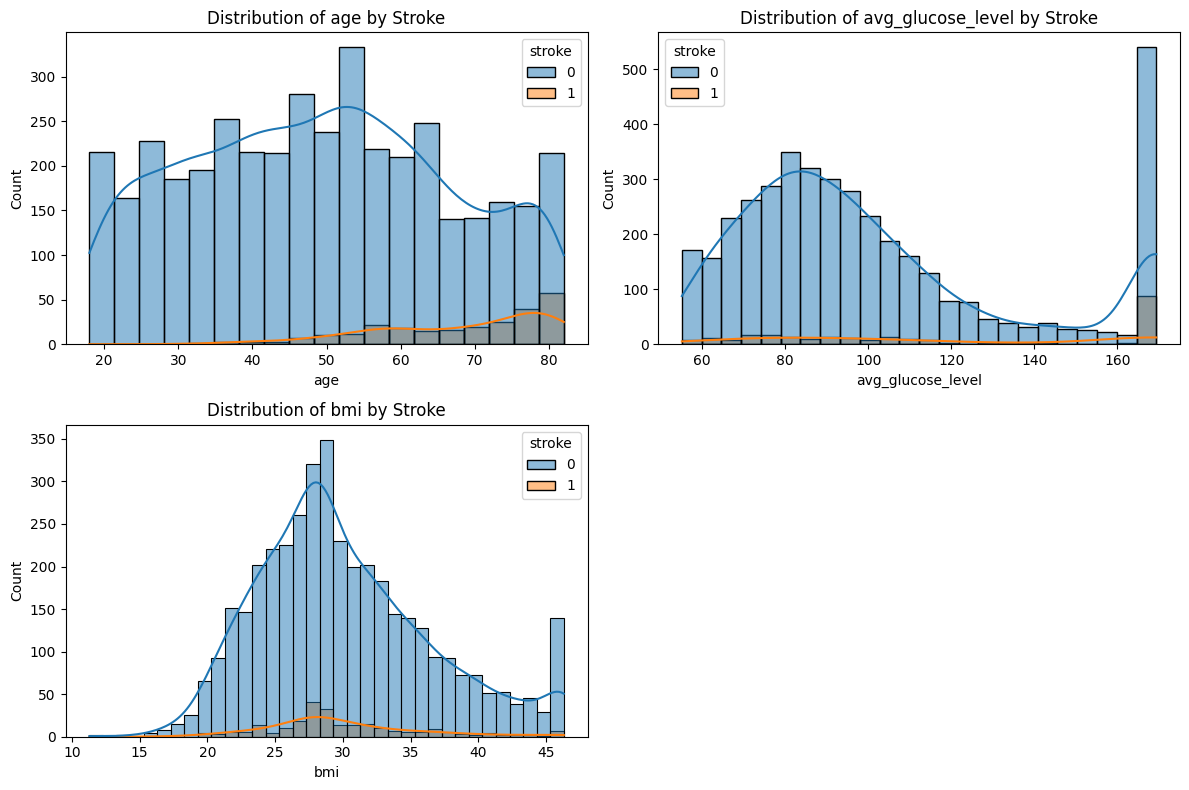

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(['age', 'avg_glucose_level', 'bmi']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(x=col, hue='stroke', data=df, kde=True)
    plt.title(f'Distribution of {col} by Stroke')
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()

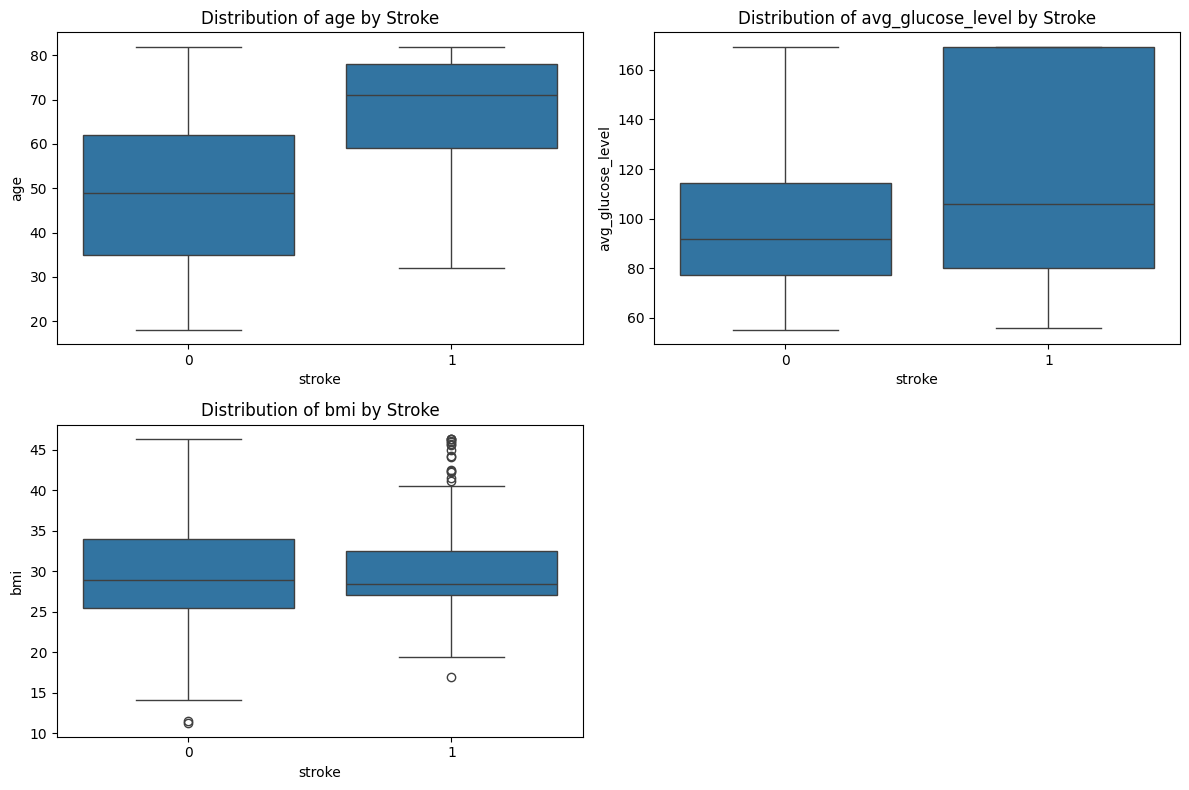

In [ ]:
# Box plots for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(['age', 'avg_glucose_level', 'bmi']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='stroke', y=col, data=df)
    plt.title(f'Distribution of {col} by Stroke')
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

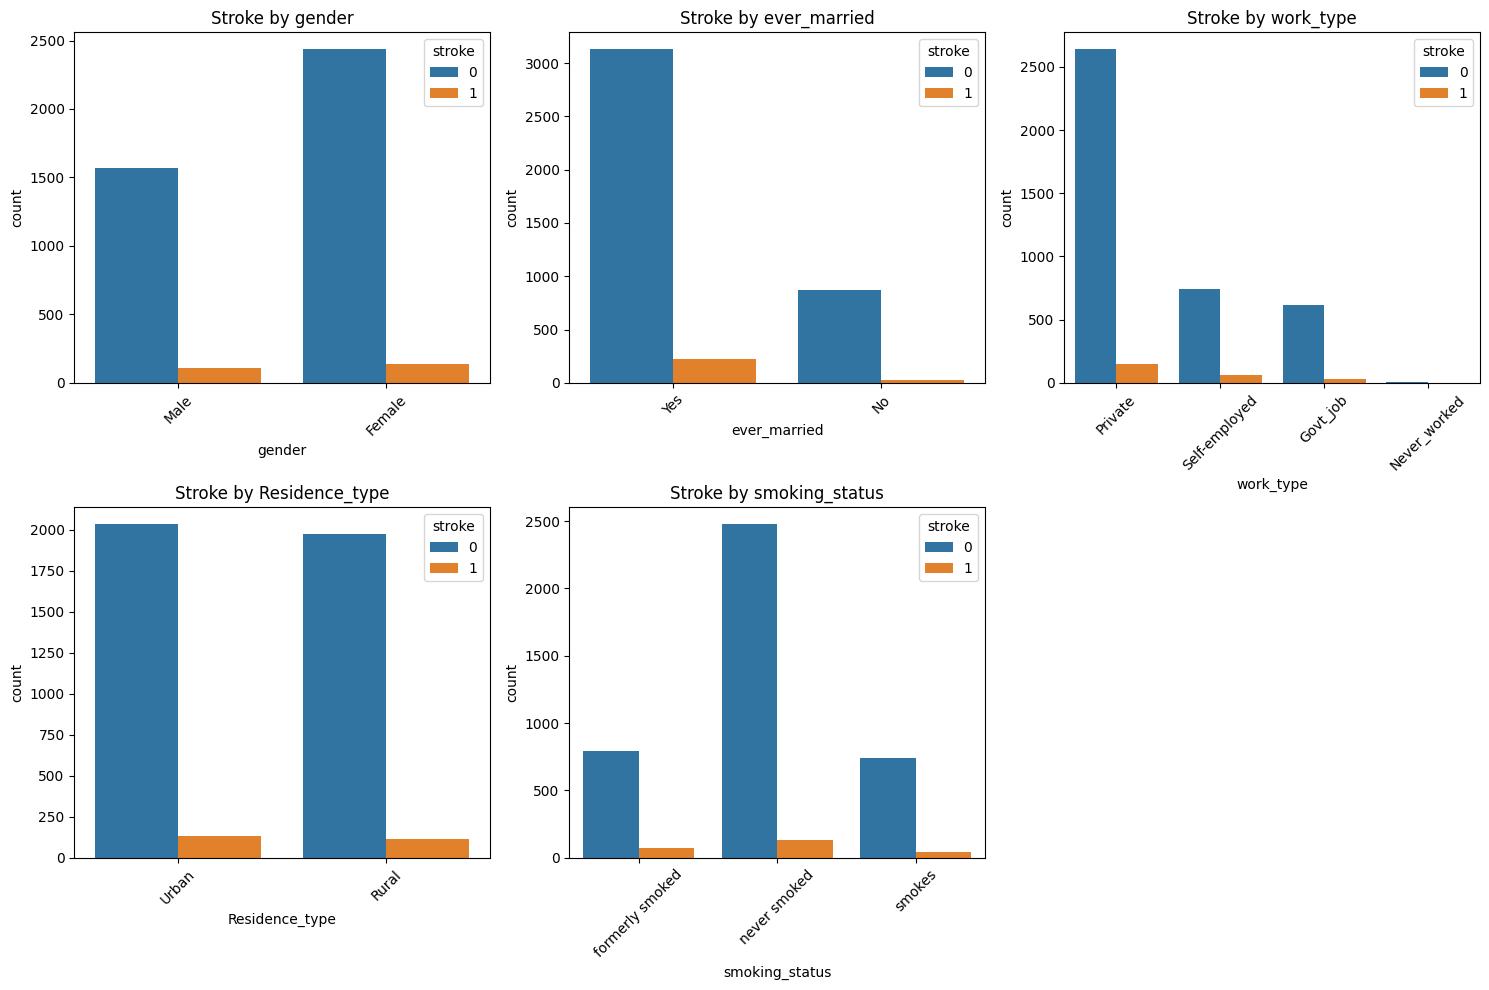

In [ ]:
# Count plots for categorical features
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, hue='stroke', data=df)
    plt.title(f'Stroke by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('countplots.png')
plt.show()

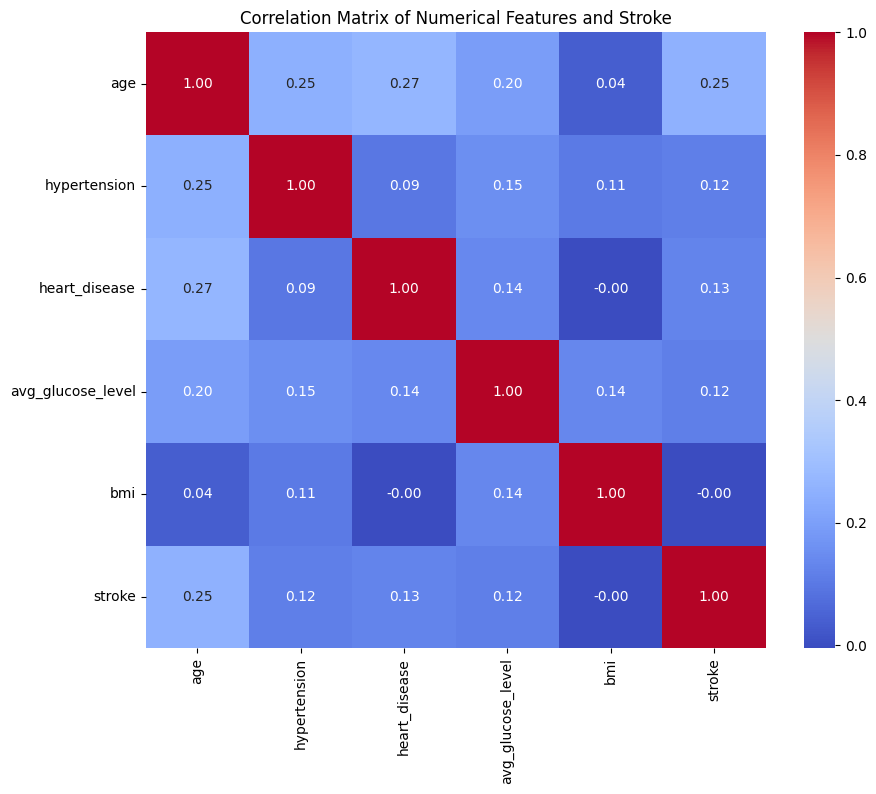

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Stroke')
plt.savefig('correlation_matrix.png')
plt.show()

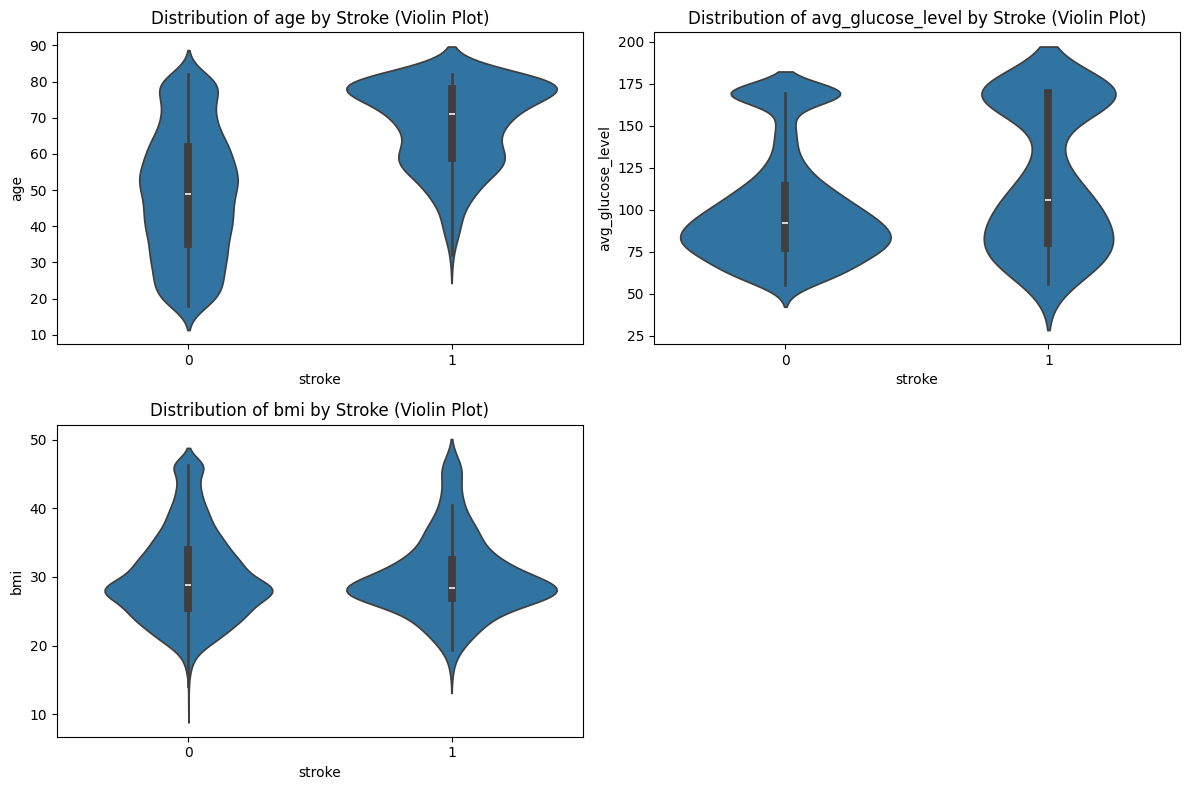

In [ ]:
# Additional visualizations (violin plots)
plt.figure(figsize=(12, 8))
for i, col in enumerate(['age', 'avg_glucose_level', 'bmi']):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='stroke', y=col, data=df)
    plt.title(f'Distribution of {col} by Stroke (Violin Plot)')
plt.tight_layout()
plt.savefig('violinplots.png')
plt.show()

In [91]:
grouped = df.groupby('work_type')[['hypertension', 'stroke']].mean()

In [92]:
grouped

,hypertension,stroke
work_type,,
Govt_job,0.111111,0.050228
Never_worked,0.000000,0.000000
Private,0.096101,0.050958
Self-employed,0.175824,0.079365
children,0.000000,0.002911


In [98]:
import plotly.express as px
#from plotly.offline import init_notebook_mode
#init_notebook_mode(connected=True)
#import plotly.figure_factory as ff
import plotly.graph_objects as go
#%matplotlib inline

In [99]:
stress_analysis = round(df.groupby('work_type')[['hypertension', 'stroke']].mean() * 100,2)
stress_analysis = stress_analysis.rename(columns={'Hypertension': 'Hypertension Rate (%)', 'Stroke': 'Stroke Rate (%)'})


fig = px.imshow(stress_analysis.T,
                labels={'x': 'Work Type', 'y': 'Indicator'},
                x=stress_analysis.index,
                y=stress_analysis.columns,
                color_continuous_scale=['#35193e', '#ad1759'],
                color_continuous_midpoint=50,
                title='High Blood Pressure and Stroke Rates by Job Type',
                text_auto=True,
                height=600, width=800)

fig.update_layout(
    title_font_size=24,
    title_font_family="Arial, sans-serif",
    title_font_color='black',
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    font=dict(family="Arial, sans-serif", size=12, color='black'),
    coloraxis_colorbar=dict(title='Oran (%)', tickvals=[0, 50, 100], ticktext=['0%', '50%', '100%'])
)

fig.show(renderer='iframe_connected')

In [89]:
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.graph_objects as go
%matplotlib inline

# Feature engineering

In [ ]:
import pandas as pd
import numpy as np

# 1. Combined hypertension and heart disease
df['hypertension_heart_disease'] = np.where((df['hypertension'] == 1) | (df['heart_disease'] == 1), 1, 0)

In [ ]:
# 2. Glucose level categorization
df['glucose_category'] = pd.cut(df['avg_glucose_level'], bins=[0, 100, 150, 200, np.inf], labels=['low', 'medium_low', 'medium_high', 'high'], include_lowest=True)
glucose_dummies = pd.get_dummies(df['glucose_category'], prefix='glucose', drop_first=True)
df = pd.concat([df, glucose_dummies], axis=1)

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,hypertension_heart_disease,glucose_category,glucose_medium_low,glucose_medium_high,glucose_high
0,9046,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.6,formerly smoked,1,1,medium_high,False,True,False
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,27.8,never smoked,1,0,medium_high,False,True,False
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.5,never smoked,1,1,medium_low,True,False,False
3,60182,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.4,smokes,1,0,medium_high,False,True,False
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.0,never smoked,1,1,medium_high,False,True,False


In [ ]:
# 3. BMI categorization
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, np.inf], labels=['underweight', 'normal', 'overweight', 'obese'], include_lowest=True)
bmi_dummies = pd.get_dummies(df['bmi_category'], prefix='bmi', drop_first=True)
df = pd.concat([df, bmi_dummies], axis=1)

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,age_group,age_middle_aged,age_senior,age_very_senior,bmi_normal,bmi_overweight,bmi_obese,bmi_normal,bmi_overweight,bmi_obese
0,9046,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.6,...,very_senior,False,False,True,False,False,True,False,False,True
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,27.8,...,senior,False,True,False,False,True,False,False,True,False
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.5,...,very_senior,False,False,True,False,False,True,False,False,True
3,60182,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.4,...,middle_aged,True,False,False,False,False,True,False,False,True
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.0,...,very_senior,False,False,True,True,False,False,True,False,False


In [ ]:
# 4. Age group feature
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 65, np.inf], labels=['young_adult', 'middle_aged', 'senior', 'very_senior'], include_lowest=True)
age_dummies = pd.get_dummies(df['age_group'], prefix='age', drop_first=True)
df = pd.concat([df, age_dummies], axis=1)

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,age_very_senior,bmi_normal,bmi_overweight,bmi_obese,bmi_normal,bmi_overweight,bmi_obese,age_middle_aged,age_senior,age_very_senior
0,9046,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.6,...,True,False,False,True,False,False,True,False,False,True
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,27.8,...,False,False,True,False,False,True,False,False,True,False
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.5,...,True,False,False,True,False,False,True,False,False,True
3,60182,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.4,...,False,False,False,True,False,False,True,True,False,False
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.0,...,True,True,False,False,True,False,False,False,False,True


In [ ]:
# 5. Interaction terms
df['age_hypertension'] = df['age'] * df['hypertension']
df['bmi_smoking'] = df['bmi'] * np.where(df['smoking_status'] == 'smokes', 1, 0)

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,bmi_overweight,bmi_obese,bmi_normal,bmi_overweight,bmi_obese,age_middle_aged,age_senior,age_very_senior,age_hypertension,bmi_smoking
0,9046,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.6,...,False,True,False,False,True,False,False,True,0.0,0.0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,27.8,...,True,False,False,True,False,False,True,False,0.0,0.0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.5,...,False,True,False,False,True,False,False,True,0.0,0.0
3,60182,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.4,...,False,True,False,False,True,True,False,False,0.0,34.4
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.0,...,False,False,True,False,False,False,False,True,79.0,0.0


In [ ]:
# Drop original features
df = df.drop(['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'age', 'glucose_category', 'bmi_category', 'age_group'], axis=1)


In [ ]:
df.head()

,id,gender,ever_married,work_type,Residence_type,smoking_status,stroke,hypertension_heart_disease,glucose_medium_low,glucose_medium_high,...,bmi_overweight,bmi_obese,bmi_normal,bmi_overweight,bmi_obese,age_middle_aged,age_senior,age_very_senior,age_hypertension,bmi_smoking
0,9046,Male,Yes,Private,Urban,formerly smoked,1,1,False,True,...,False,True,False,False,True,False,False,True,0.0,0.0
1,51676,Female,Yes,Self-employed,Rural,never smoked,1,0,False,True,...,True,False,False,True,False,False,True,False,0.0,0.0
2,31112,Male,Yes,Private,Rural,never smoked,1,1,True,False,...,False,True,False,False,True,False,False,True,0.0,0.0
3,60182,Female,Yes,Private,Urban,smokes,1,0,False,True,...,False,True,False,False,True,True,False,False,0.0,34.4
4,1665,Female,Yes,Self-employed,Rural,never smoked,1,1,False,True,...,False,False,True,False,False,False,False,True,79.0,0.0


# Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'stroke' is the target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Print the shapes of the resulting datasets
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(2977, 27) (2977,)
(638, 27) (638,)
(639, 27) (639,)


# Model training

In [ ]:
# Convert categorical features to numerical using one-hot encoding
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_val_encoded = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True)

In [ ]:
# Align columns in validation set with training set
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

In [ ]:
# Train the classifier
rf_classifier.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the validation set
y_pred = rf_classifier.predict(X_val_encoded)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
y_pred_proba = rf_classifier.predict_proba(X_val_encoded)[:, 1]
auc_roc = roc_auc_score(y_val, y_pred_proba)
conf_matrix = confusion_matrix(y_val, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9342
Precision: 0.1429
Recall: 0.0270
F1-score: 0.0455
AUC-ROC: 0.6901
Confusion Matrix:
[[595   6]
 [ 36   1]]


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.99      0.97       601
           1       0.14      0.03      0.05        37

    accuracy                           0.93       638
   macro avg       0.54      0.51      0.51       638
weighted avg       0.90      0.93      0.91       638



# Model optimization

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', 'balanced_subsample', {0: 1, 1: 5}, {0: 1, 1: 10}, {0: 1, 1: 20}],
}

In [ ]:
# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,  # Use all available cores
    cv=5 # 5-fold cross validation
)

In [ ]:
# Fit the randomized search to the training data
random_search.fit(X_train_encoded, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample',
                                                         {0: 1, 1: 5},
                                                         {0: 1, 1: 10},
                                                         {0: 1, 1: 20}],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='roc_auc')

In [ ]:
# Get the best estimator
best_rf_classifier = random_search.best_estimator_

In [ ]:
# Make predictions on the validation set
y_pred = best_rf_classifier.predict(X_val_encoded)
y_pred_proba = best_rf_classifier.predict_proba(X_val_encoded)[:, 1]

In [ ]:
# Evaluate the best model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc_roc = roc_auc_score(y_val, y_pred_proba)
conf_matrix = confusion_matrix(y_val, y_pred)

In [ ]:
# Print results
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': {0: 1, 1: 5}}
Accuracy: 0.9185
Precision: 0.1053
Recall: 0.0541
F1-score: 0.0714
AUC-ROC: 0.7142
Confusion Matrix:
[[584  17]
 [ 35   2]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       601
           1       0.11      0.05      0.07        37

    accuracy                           0.92       638
   macro avg       0.52      0.51      0.51       638
weighted avg       0.89      0.92      0.91       638

